In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.3.0


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data(path='mnist.npz')
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 0s 0us/step


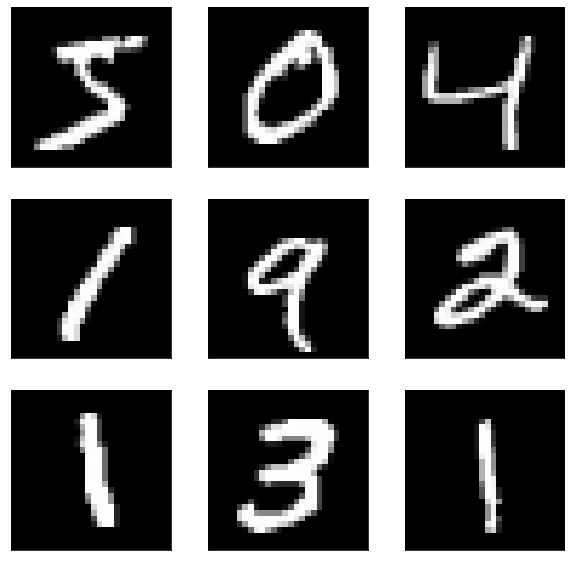

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [8]:
(train_images.shape, train_labels.shape), (test_images.shape, test_labels.shape)

(((60000, 28, 28, 1), (60000, 10)), ((10000, 28, 28, 1), (10000, 10)))

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# one hot encoding the target variable
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 4)         148       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,198
Trainable params: 1,198
Non-trainable params: 0
____________________________________________________

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4561 - accuracy: 0.8586 - val_loss: 0.1807 - val_accuracy: 0.9441
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1644 - accuracy: 0.9506 - val_loss: 0.1275 - val_accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1294 - accuracy: 0.9611 - val_loss: 0.1124 - val_accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1150 - accuracy: 0.9645 - val_loss: 0.0957 - val_accuracy: 0.9706
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1062 - accuracy: 0.9671 - val_loss: 0.0954 - val_accuracy: 0.9704
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1014 - accuracy: 0.9683 - val_loss: 0.0928 - val_accuracy: 0.9713
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0969 - accuracy: 0.9701 - val_loss: 0.0852 -

El numero predicho para esta imagen es:  3
valor real:  3


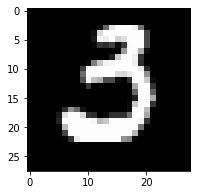

In [15]:
indice_de_la_figura = 6517
example = test_images[indice_de_la_figura].reshape((28,28))
plt.figure(figsize=(3,3))
plt.imshow(example, cmap = "gray")
x = example.reshape((1,28,28,1))
y = np.array(model.predict(x))

max = np.where(y.reshape(10)== y.max())
x_predicted= int(max[0])
print("El numero predicho para esta imagen es: ",x_predicted)
et = test_labels[indice_de_la_figura]
yreal = np.where(et == 1)
yreal = int(yreal[0])
print("valor real: ", yreal)